In [ ]:
%cd /content/drive/MyDrive/_main_/1_FL/data_energy/datalog

/content/drive/MyDrive/_main_/1_FL/data_energy/datalog


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf ### AI
import sklearn

import json
from glob import glob

In [ ]:
def get_data(lista_j, label):
    datas_x1 = pd.DataFrame(lista_j)
    datas_x2 = pd.DataFrame([i['data'] for i in lista_j])
    datas = pd.concat([datas_x1, datas_x2], axis=1).drop(columns=['data'])
    datas['fechaCreacion'] = datas['fechaCreacion'].astype('datetime64[ms]')
    datas = datas.sort_values('fechaCreacion')
    datas.index = datas['fechaCreacion']
    # datas = datas.resample('1min').sum()
    datas = datas.resample('1min').mean()
    datas['label'] = label
    # return datas.drop(columns=['idLog', 'idSensor'])[['corriente', 'voltaje', 'potencia', 'potencia_efectiva', 'energia', 'frecuencia', 'pf', 'fechaCreacion']]
    # return datas[['corriente', 'voltaje', 'potencia', 'potencia_efectiva', 'energia', 'frecuencia', 'pf', 'fechaCreacion']]
    # return datas[['corriente', 'voltaje', 'potencia', 'potencia_efectiva', 'energia', 'frecuencia', 'pf']]
    return datas[['corriente', 'potencia', 'potencia_efectiva', 'pf', 'label']].dropna()

In [ ]:
def get_vector(vector_x):
    # dx = dataframe.iloc[15:29] ### 14 values
    dx = vector_x.copy()
    n = dx.shape[0]
    X = []
    for i in range(0,n, 2):
        j = i+2
        # print(i, j)
        dy = dx.iloc[i:j].values.mean(axis=0).tolist()
        X.append(dy)
        # print(dy)

    xx = np.array(X).flatten().tolist()
    return xx

In [ ]:
def get_XT(dataf):
    
    XT = []
    n = dataf.shape[0] ### size del dataframe
    for i in range(0, n-14): ### iteracion del dataframe | 14 frames
        m = i+14
        x_0 = dataf.iloc[i:m]
        nas = x_0.isna().values.sum()
        # print(nas)
        if nas==0:
            vector_x = get_vector(x_0) ### x_vector
            # print(vector_x)
            XT.append(vector_x)
    return np.array(XT)

In [ ]:
glob("*json")

['ventilador_on.json',
 'lampara_on.json',
 'congelador_on.json',
 'congelador_v1.json',
 'lampara_v1.json',
 'ventilador_v1.json']

In [ ]:
### load jsons
v1 = json.load(open('ventilador_on.json'))
v2 = json.load(open('ventilador_v1.json'))
l1 = json.load(open('lampara_on.json'))
l2 = json.load(open('lampara_v1.json'))
c1 = json.load(open('congelador_on.json'))
c2 = json.load(open('congelador_v1.json'))

In [132]:
print("""\
{'data': {'corriente': 0.44,
  'energia': 0.87,
  'frecuencia': 60.0,
  'pf': 0.97,
  'potencia': 52.711999999999996,
  'potencia_efectiva': 51.3,
  'voltaje': 119.8},
 'fechaCreacion': '2022-07-01T18:38:41.704+00:00',
 'idLog': '62bf3f31c03a423caae7c9e6',
 'idSensor': '98:CD:AC:31:CE:BF'}\
 """.replace("'", '"'))

{"data": {"corriente": 0.44,
  "energia": 0.87,
  "frecuencia": 60.0,
  "pf": 0.97,
  "potencia": 52.711999999999996,
  "potencia_efectiva": 51.3,
  "voltaje": 119.8},
 "fechaCreacion": "2022-07-01T18:38:41.704+00:00",
 "idLog": "62bf3f31c03a423caae7c9e6",
 "idSensor": "98:CD:AC:31:CE:BF"} 


In [ ]:
# v1[0]

In [ ]:
def get_data(lista_j):
    # datas = pd.DataFrame(lista_j)
    # return datas
    datas_x1 = pd.DataFrame(lista_j)
    datas_x2 = pd.DataFrame([i['data'] for i in lista_j])
    datas = pd.concat([datas_x1, datas_x2], axis=1).drop(columns=['data'])
    datas['fechaCreacion'] = datas['fechaCreacion'].astype('datetime64[ms]')
    datas = datas.sort_values('fechaCreacion')
    datas.index = datas['fechaCreacion']
    # datas = datas.resample('1min').sum()
    datas = datas.resample('1min').mean()
    return datas[['corriente', 'potencia', 'potencia_efectiva', 'pf']].dropna()

json_string = {'data': {'corriente': 0.44,'energia': 0.87,'frecuencia': 60.0,'pf': 0.97,'potencia': 52.711999999999996,'potencia_efectiva': 51.3,'voltaje': 119.8},'fechaCreacion': '2022-07-01T18:38:41.704+00:00','idLog': '62bf3f31c03a423caae7c9e6','idSensor': '98:CD:AC:31:CE:BF'}
df = get_data([json_string])
df

,corriente,potencia,potencia_efectiva,pf
fechaCreacion,,,,
2022-07-01 18:38:00,0.44,52.712,51.3,0.97


In [ ]:
json_string = {'data': {'corriente': 0.44,'energia': 0.87,'frecuencia': 60.0,'pf': 0.97,'potencia': 52.711999999999996,'potencia_efectiva': 51.3,'voltaje': 119.8},'fechaCreacion': '2022-07-01T18:38:41.704+00:00','idLog': '62bf3f31c03a423caae7c9e6','idSensor': '98:CD:AC:31:CE:BF'}
cadena_json = json.dumps(json_string)
json_input = json.loads(cadena_json)
json_string

In [ ]:
json_string['data']

{'corriente': 0.44,
 'energia': 0.87,
 'frecuencia': 60.0,
 'pf': 0.97,
 'potencia': 52.711999999999996,
 'potencia_efectiva': 51.3,
 'voltaje': 119.8}

In [ ]:
pd.DataFrame([json_string['data']])

,corriente,energia,frecuencia,pf,potencia,potencia_efectiva,voltaje
0,0.44,0.87,60.0,0.97,52.712,51.3,119.8


In [ ]:
json_string = "[{'data': {'corriente': 0.44,'energia': 0.87,'frecuencia': 60.0,'pf': 0.97,'potencia': 52.711999999999996,'potencia_efectiva': 51.3,'voltaje': 119.8},'fechaCreacion': '2022-07-01T18:38:41.704+00:00','idLog': '62bf3f31c03a423caae7c9e6','idSensor': '98:CD:AC:31:CE:BF'}]"
cadena_json = json.dumps(json_string)
json_input = json.loads(cadena_json)
json_input

"[{'data': {'corriente': 0.44,'energia': 0.87,'frecuencia': 60.0,'pf': 0.97,'potencia': 52.711999999999996,'potencia_efectiva': 51.3,'voltaje': 119.8},'fechaCreacion': '2022-07-01T18:38:41.704+00:00','idLog': '62bf3f31c03a423caae7c9e6','idSensor': '98:CD:AC:31:CE:BF'}]"

In [122]:
x_train

array([[-0.09422211, -0.08268168,  0.1798135 ,  1.25083971],
       [-0.62236248, -0.62052892, -0.74624627, -0.50186542],
       [ 2.27946455,  2.36937696,  2.08421688, -0.08026878],
       ...,
       [-0.62236248, -0.61959568, -0.74624627, -0.54213027],
       [-0.62236248, -0.62123437, -0.74572732, -0.50186542],
       [-0.10698387, -0.10897773,  0.14480084,  1.25202397]])

In [86]:
scaler.fit()

StandardScaler()

In [85]:
clf.predict_proba()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [131]:
v1[0]

{'data': {'corriente': 0.44,
  'energia': 0.87,
  'frecuencia': 60.0,
  'pf': 0.97,
  'potencia': 52.711999999999996,
  'potencia_efectiva': 51.3,
  'voltaje': 119.8},
 'fechaCreacion': '2022-07-01T18:38:41.704+00:00',
 'idLog': '62bf3f31c03a423caae7c9e6',
 'idSensor': '98:CD:AC:31:CE:BF'}

In [117]:
new = json.dumps(c1[0])
x_vector = get_data([json.loads(new)], 0).values[:, :-1]
xx = scaler.transform(x_vector)
xx

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[2.44045901, 2.52855676, 2.49392502, 0.09737025]])

In [118]:
s1, s2, s3 = clf.predict_proba(xx)[0]
s1, s2, s3

(0.004049947319316839, 0.005417514815203175, 0.99053253786548)

In [ ]:
# convolucional

In [ ]:
### load dataframes
dv1 = get_data(v1, 0)
dv2 = get_data(v2, 0)
dl1 = get_data(l1, 1)
dl2 = get_data(l2, 1)
dc1 = get_data(c1, 2)
dc2 = get_data(c2, 2)

ds = pd.concat([dv1, dv2, dl1, dl2, dc1, dc2])
ds.head(3)

,corriente,potencia,potencia_efectiva,pf,label
fechaCreacion,,,,,
2022-07-01 18:28:00,0.44,52.858667,51.433333,0.966667,0
2022-07-01 18:35:00,0.44,52.294000,50.533333,0.965000,0
2022-07-01 18:36:00,0.44,52.415733,50.760000,0.964667,0


In [ ]:
ventilador = ds[ds.label==0]
lampara = ds[ds.label==1]
congelador = ds[ds.label==2]

In [ ]:
ds.groupby('label').size()

label
0    393
1    322
2    482
dtype: int64

In [ ]:
df_resample = pd.concat([ventilador.sample(n = lampara.shape[0], random_state = 100),
                         lampara,
                         congelador.sample(n = lampara.shape[0], random_state = 100)
                        ], axis=0)

X, y = df_resample.loc[:, df_resample.columns != 'label'], df_resample['label']
X.shape, y.shape

((966, 4), (966,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lol = y_test.to_frame().groupby('label').size()

    f1, f2, f3 = lol.loc[0], lol.loc[1], lol.loc[2]
    arr = np.array([abs(f1-f2), abs(f1-f3), abs(f3-f2)])

    kl = 2

    condd = arr <= kl
    if (condd).sum()>=2:
        print(arr)
        print(condd)
        print(i)

[2 2 0]
[ True  True  True]
48


In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=kl)

# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [128]:
pd.DataFrame(x_train).to_csv('scalerr.csv', header=None, index=False)

In [125]:
x_train

array([[-0.09422211, -0.08268168,  0.1798135 ,  1.25083971],
       [-0.62236248, -0.62052892, -0.74624627, -0.50186542],
       [ 2.27946455,  2.36937696,  2.08421688, -0.08026878],
       ...,
       [-0.62236248, -0.61959568, -0.74624627, -0.54213027],
       [-0.62236248, -0.62123437, -0.74572732, -0.50186542],
       [-0.10698387, -0.10897773,  0.14480084,  1.25202397]])

In [107]:
d_scaler = pd.DataFrame(x_train)
d_scaler

,0,1,2,3
0,-0.094222,-0.082682,0.179813,1.250840
1,-0.622362,-0.620529,-0.746246,-0.501865
2,2.279465,2.369377,2.084217,-0.080269
3,-0.622362,-0.621330,-0.746246,-0.497128
4,-0.622362,-0.618699,-0.746376,-0.542130
...,...,...,...,...
719,-0.622362,-0.623186,-0.746107,-0.471075
720,-0.622362,-0.621609,-0.745857,-0.445021
721,-0.622362,-0.619596,-0.746246,-0.542130
722,-0.622362,-0.621234,-0.745727,-0.501865


In [108]:
d_scaler.to_csv('scaler.csv', header=None, index=False)

In [ ]:
# pd.to_csv('scaler.csv')

In [90]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf = SVC(gamma='auto', probability=True)
clf.fit(x_train, y_train)

SVC(gamma='auto', probability=True)

In [93]:
SVC?

In [95]:
y_pred[:10]

array([1, 0, 2, 0, 0, 1, 1, 0, 0, 2])

In [96]:
y_pred[:10]

array([1, 0, 2, 0, 0, 1, 1, 0, 0, 2])

In [94]:
from sklearn.metrics import classification_report

target_names = ['ventilador', 'lampara', 'congelador']
y_pred = clf.predict(x_test)

print(classification_report(y_pred, y_test, target_names=target_names))

              precision    recall  f1-score   support

  ventilador       1.00      1.00      1.00        78
     lampara       1.00      1.00      1.00        76
  congelador       1.00      1.00      1.00        88

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [92]:
import pickle

pickle.dump(clf, open('model_svm.pkl', 'wb'))

In [ ]:
!pip install session-info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=162b0adff6cecb71e408fa4acaeb53810f97867d8bdc909e643717e806acb91b
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [ ]:
import session_info
session_info.show()

In [ ]:
!pip freeze >> re.txt

In [ ]:
!cat re.txt

absl-py==1.1.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.1
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.7
certifi==2022.6.15
cffi==1.15.1
cftime==1.6.1
chardet==3.0.4
charset-normalizer==2.1.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.5
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
deprecat==2.1.1
descartes==1.1.0
dill==0.3.5.1
distributed==

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input, Activation, Dropout
from keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import RMSprop
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
y_T = pd.get_dummies(y.values.ravel())
clases_T = list(y_T.columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y_T, test_size=0.25, random_state=kl)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
ret = x_train.shape[1]
layers = 0
ret

4

In [ ]:
model = Sequential()
model.add(Dense(ret, activation='sigmoid', input_shape=(ret,)));layers+=1
model.add(Dropout(.05))
model.add(Dense(ret*2, activation='sigmoid'));layers+=1
model.add(Dropout(.10))
model.add(Dense(ret*3, activation='sigmoid'));layers+=1
model.add(Dropout(.15))

model.add(Dense(3, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3

In [ ]:
history = model.fit(x=x_train, 
          y=y_train,
          validation_data=(x_test, y_test),
          epochs=150)

Epoch 1/150
23/23 [==============================] - 1s 12ms/step - loss: 1.1205 - accuracy: 0.3743 - val_loss: 1.0934 - val_accuracy: 0.5083
Epoch 2/150
23/23 [==============================] - 0s 3ms/step - loss: 1.1324 - accuracy: 0.3467 - val_loss: 1.0919 - val_accuracy: 0.3140
Epoch 3/150
23/23 [==============================] - 0s 3ms/step - loss: 1.1331 - accuracy: 0.3536 - val_loss: 1.0902 - val_accuracy: 0.5124
Epoch 4/150
23/23 [==============================] - 0s 4ms/step - loss: 1.1125 - accuracy: 0.3577 - val_loss: 1.0889 - val_accuracy: 0.3140
Epoch 5/150
23/23 [==============================] - 0s 3ms/step - loss: 1.1059 - accuracy: 0.3771 - val_loss: 1.0867 - val_accuracy: 0.6364
Epoch 6/150
23/23 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.3729 - val_loss: 1.0849 - val_accuracy: 0.6570
Epoch 7/150
23/23 [==============================] - 0s 3ms/step - loss: 1.1123 - accuracy: 0.3481 - val_loss: 1.0831 - val_accuracy: 0.6364
Epoch 8/150


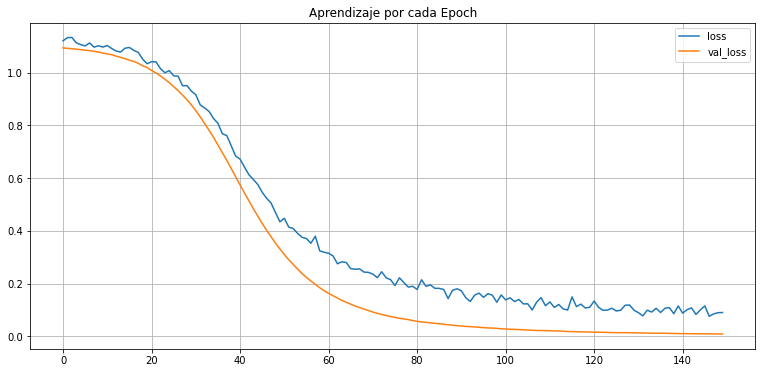

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title("Aprendizaje por cada Epoch")
plt.grid()
plt.show()

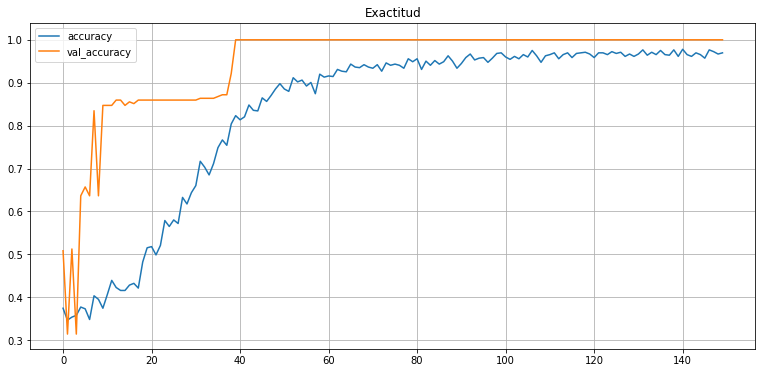

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("Exactitud")
plt.ylim([None, 1.04])
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = [y_test.columns[i] for i in y_pred]

y_test2 = y_test.values.argmax(axis=1)
# y_test2 = [y_test.columns[i] for i in y_test2]

mc = confusion_matrix(y_test2, y_pred)
mc

array([[78,  0,  0],
       [ 0, 76,  0],
       [ 0,  0, 88]])

In [ ]:
clases = y_test.columns
clases2 = [str(i)+'%' for i in clases]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00        88

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



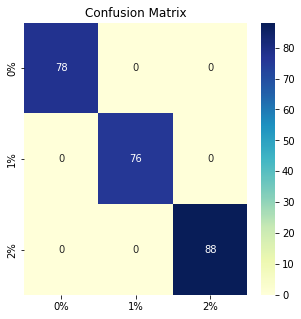

In [ ]:
import seaborn as sns
print(classification_report(y_test2, y_pred))

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mc, 
            xticklabels=clases2,
            yticklabels=clases2,
            linecolor='red', 
            fmt='.0f',
            annot=True,
            cmap='YlGnBu',
            ax=ax)
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
# plt.ylabel('y preds')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
loaded_model = load_model('model.h5')

In [134]:
s4, s5, s6 = loaded_model.predict(x_test)[0]
s4, s5, s6

(0.00043292498, 0.0011256556, 0.9984414)

In [ ]:
!pip show keras

Name: keras
Version: 2.8.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


In [135]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.2+zzzcolab20220527125636
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: wrapt, setuptools, google-pasta, gast, keras-preprocessing, tensorboard, tensorflow-io-gcs-filesystem, termcolor, libclang, numpy, protobuf, absl-py, six, keras, flatbuffers, astunparse, opt-einsum, typing-extensions, grpcio, h5py, tensorflow-estimator
Required-by: kapre
